#### Imports

In [11]:
import os
import sys

# --- PATH SETUP ---
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '../..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.prediction.estimator import EnergyEstimator



Model loaded from c:\Users\MOSTAFA\Desktop\Foundations of ML Frameworks\Final Project\Project\Sustainable_AI_G3-\model\energy_predictor\energy_model_RandomForest.pkl
Model loaded from c:\Users\MOSTAFA\Desktop\Foundations of ML Frameworks\Final Project\Project\Sustainable_AI_G3-\model\energy_predictor\energy_model_LinearRegression.pkl


C:\Users\MOSTAFA\AppData\Local\Temp\ipykernel_43204\364407791.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


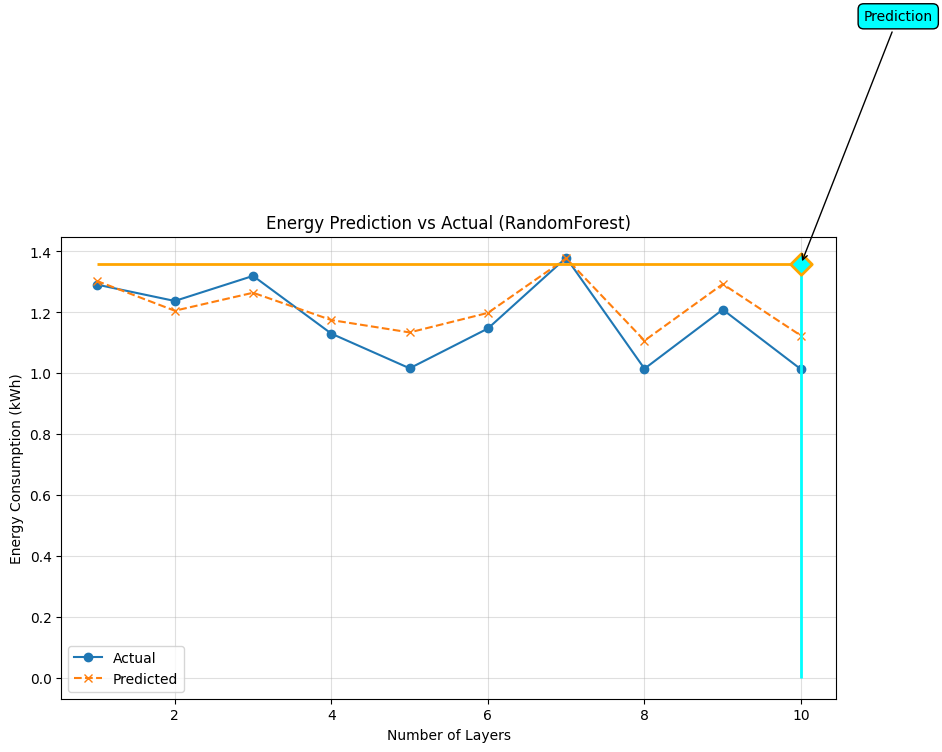

In [12]:

estimator_random_forest = EnergyEstimator(model_type="RandomForest")
estimator_linear_regression = EnergyEstimator(model_type="LinearRegression")

results_random_forest = estimator_random_forest.estimate("sssssss", 10, 5, 1.5e18)
results_linear_regression = estimator_linear_regression.estimate("sssssss", 10, 5, 1.5e18)

fig = estimator_random_forest.get_training_plot(10)
fig.show()

C:\Users\MOSTAFA\AppData\Local\Temp\ipykernel_43204\621540848.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


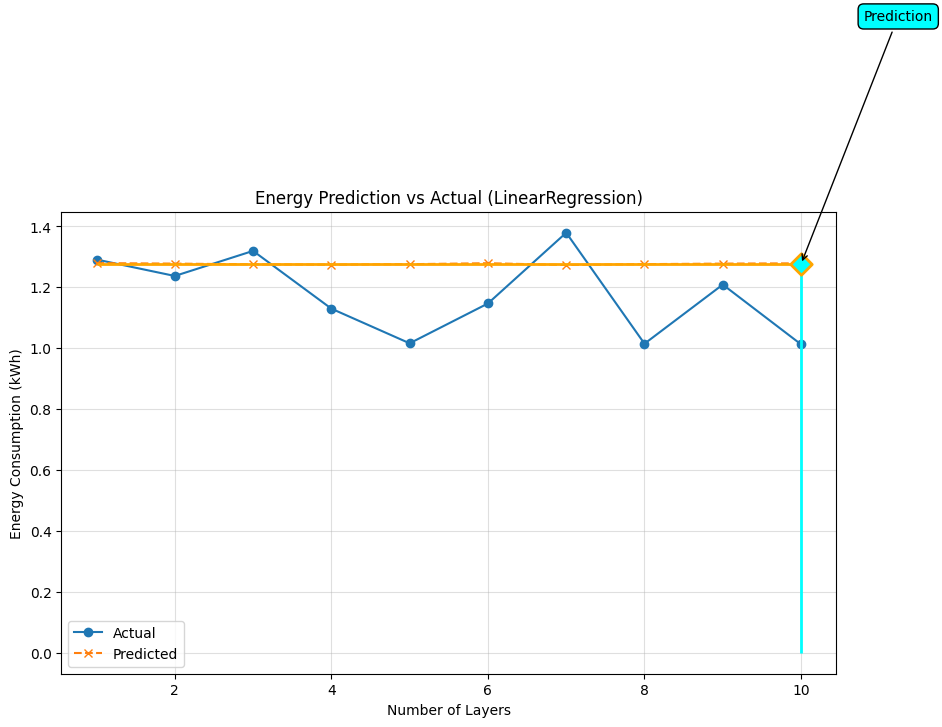

In [13]:
fig = estimator_linear_regression.get_training_plot(10)
fig.show()